In [17]:
import wandb
import random

# YOLOv5 
github 주소 : https://github.com/ultralytics/yolov5 <br>
데이터 저장소 : https://public.roboflow.com

One-Stage Object detetion 딥러닝 기법으로 기존에 FastRCNN보다 빠르며, <br> Darknet으로 어렵게 구현하던 Yolo가 아닌 Multiple Object Detection을 위해 고안된 모델

## 환경설정

yolov5의 소스 코드 및 모델 구현을 가져온다

In [65]:
# %cd content
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...


필수 라이브러리 설치

In [19]:
# %cd C:\Users\ebdl\Project 폴더\content\yolov5

# !pip install -r requirements.txt

In [20]:
# !pip install roboflow

In [21]:
from roboflow import Roboflow

# 축구공 탐지

다음과 같은 구조로 저장되어야한다

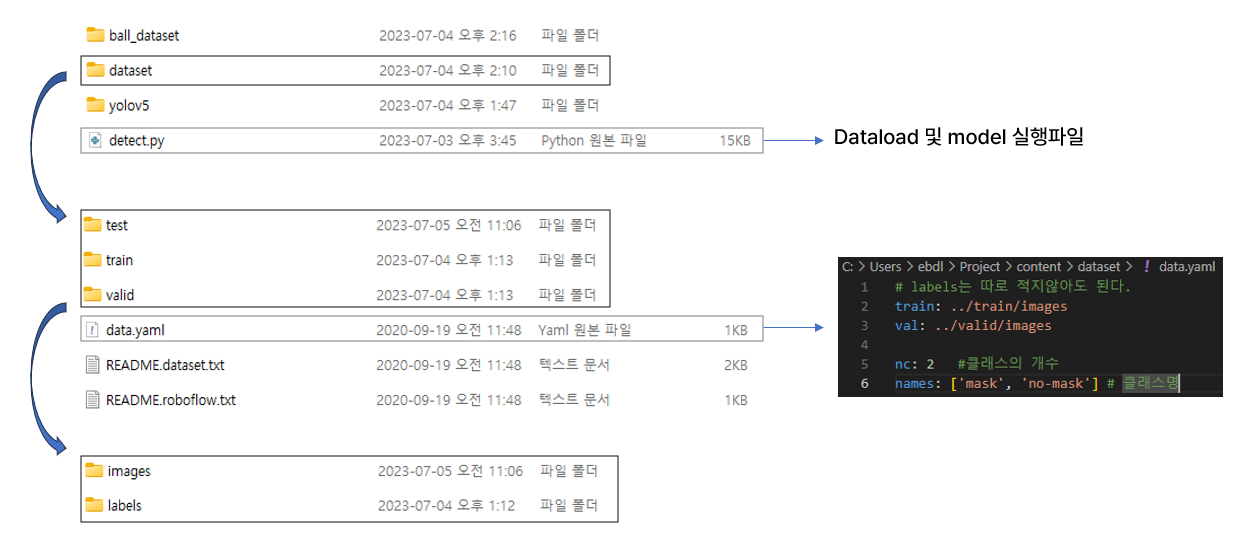

데이터셋 다운로드

In [39]:
# rf = Roboflow(api_key="FhfkvOwLXnAMUM10Fsw9")
# project = rf.workspace("mftest").project("footballs-1trlz")
# dataset = project.version(5).download("yolov5")

사전 훈련된 가중치로 test셋 객체 탐지 실행

In [40]:
# !python detect.py --source C:\Users\ebdl\Project\content\ball_dataset\test\images\test

결과 시각화

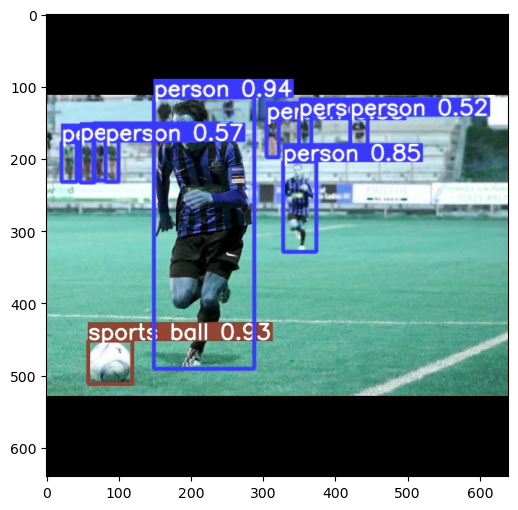

In [25]:
import cv2
import matplotlib.pyplot as plt
from glob import glob

img_paths = glob("runs/detect/exp3//*")

img = cv2.imread(img_paths[1])
plt.figure(figsize=(10,6))
plt.imshow(img)
plt.show()

# 마스크 탐지

In [26]:
# %mkdir dataset
# %cd dataset

데이터 다운로드

In [27]:
# !curl -L "https://public.roboflow.com/ds/eL4QUdkpSR?key=0ikL5WLM1w" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

In [35]:
%cd C:\Users\ebdl\Project\content\yolov5

C:\Users\ebdl\Project\content\yolov5


In [36]:
%pwd

'C:\\Users\\ebdl\\Project\\content\\yolov5'

사전 훈련된 가중치로 test셋 객체 탐지 실행

In [37]:
!python detect.py --source C:\Users\ebdl\Project\content\dataset\test\images

C:\Users\ebdl\Anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\ebdl\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\ebdl\Anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
C:\Users\ebdl\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
detect: weights=yolov5s.pt, source=C:\Users\ebdl\Project\content\dataset\test\images, data=data\coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\det

임의의 이미지를 추가해서 시각화한 결과

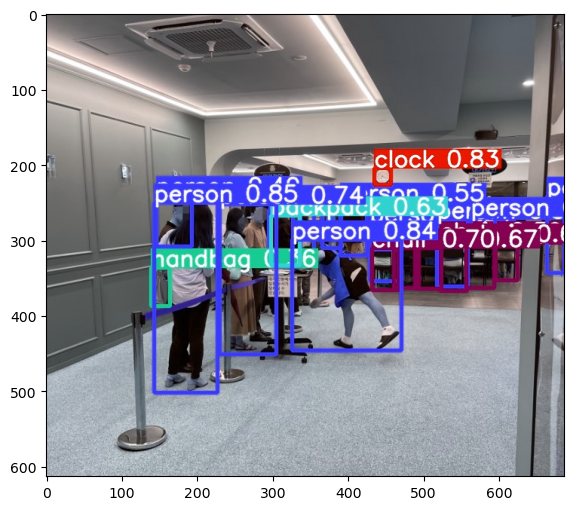

In [38]:
import cv2
import matplotlib.pyplot as plt
from glob import glob

img_paths = glob("runs/detect/exp6/*")

img = cv2.imread(img_paths[7])
plt.figure(figsize=(10,6))
plt.imshow(img)
plt.show()

# YOLOv5 데이터셋 만들기 :yaml 파일 제작

In [47]:
%cd ../

C:\Users\ebdl\Project\content


In [51]:
import yaml

with open("dataset/data.yaml", 'r',encoding='utf-8') as f:
  data = yaml.load(f, Loader=yaml.FullLoader)

data['train'] = "/content/dataset/"
data['test'] = "/content/dataset/"
data['val'] = "/content/dataset/"

with open("dataset/data.yaml", 'w') as f:
  yaml.dump(data, f)

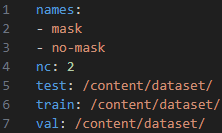

In [63]:
!pip install --user numpy==1.20.0

     --------------------------------------- 13.7/13.7 MB 14.2 MB/s eta 0:00:00


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.5.0 requires daal==2021.4.0, which is not installed.
tensorflow 2.5.0 requires numpy~=1.19.2, but you have numpy 1.20.0 which is incompatible.
basemap 1.3.6 requires numpy<1.24,>=1.22; python_version >= "3.8", but you have numpy 1.20.0 which is incompatible.
basemap 1.3.6 requires pyproj<3.5.0,>=1.9.3; python_version >= "3.5", but you have pyproj 3.5.0 which is incompatible.
tensorflow-gpu 2.10.0 requires absl-py>=1.0.0, but you have absl-py 0.15.0 which is incompatible.
tensorflow-gpu 2.10.0 requires flatbuffers>=2.0, but you have flatbuffers 1.12 which is incompatible.
tensorflow-gpu 2.10.0 requires protobuf<3.20,>=3.9.2, but you have protobuf 4.23.2 which is incompatible.
tensorflow-g

In [ ]:
!python train.py --data C:\Users\ebdl\Project\content\dataset\data.yaml --epochs 30 --batch 16